In [1]:
% pylab inline
figsize(10, 8)

import sys
sys.path.append("D:/ds/code/implementation")

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pickle

with open('D:/ds/code/implementation/allevents2.pkl', 'rb') as file:  # ptweets500k_30min.pkl
    docs = pickle.load(file)
    
with open('D:/ds/flooding/floods.pkl', 'rb') as file:
    floods = pickle.load(file)

In [3]:
from datetime import timedelta

tmin = min([d['times']['start'] for d in docs]) - timedelta(days=2) 
tmax = max([d['times']['finish'] for d in docs])
tmin, tmax

(datetime.datetime(2015, 12, 6, 16, 0, 0, 99000),
 datetime.datetime(2015, 12, 27, 7, 37, 16, 354000))

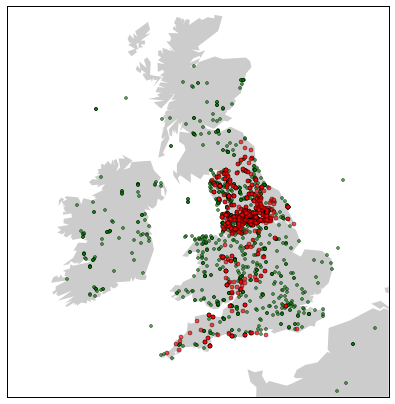

In [10]:
from mpl_toolkits.basemap import Basemap

fig = figure(figsize=(14,7))
ax = fig.add_subplot(111, frame_on=False)
#mp = Basemap(projection='robin', lat_0=0, lon_0=0,
#              resolution='l', area_thresh=1000.0)
mp = Basemap(projection='merc', lat_0=53.458736, lon_0=-2.2,
    resolution='l', area_thresh = 1000.0,
    urcrnrlat=58.869587, urcrnrlon=4.186178,
    llcrnrlat=48.949979, llcrnrlon=-12.359231) # lat, lon

for x in docs:
    for p in x['centres']:
        if p is None: 
            continue
            
        x2,y = mp(p[1], p[0])
        ms = 3#(len(x['tweets']) / 10) ** (1/2)
        mp.plot(x2, y, 'o', markersize=ms, color='green', alpha=0.7)

for x in floods:
    if x['starttime'] < tmin or x['starttime'] > tmax:
        continue
    try:
        x2,y = mp(x['coordinates'][0], x['coordinates'][1])
    except KeyError:
        continue
        
    mp.plot(x2, y, 'o', markersize=4, color='red', alpha=0.7)
        
#mp.drawcoastlines()
#mp.drawcountries()
mp.fillcontinents(color='#CCCCCC')#, zorder=0)
mp.drawmapboundary()

#name = input("name? >")
#plt.savefig(name, dpi=200, alpha=True)

[]

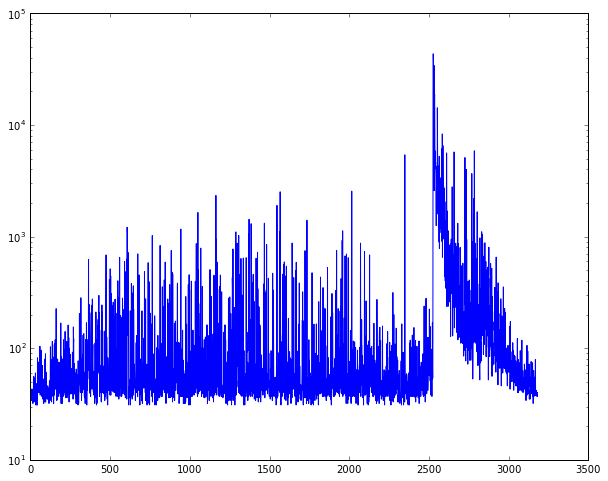

In [6]:
plot([len(x['tweets']) for x in docs])
semilogy()

In [28]:
print(docs[0])

{'tweets': [{'time': datetime.datetime(2015, 12, 8, 16, 21, 48, 591000), 'coordinate': [53.93045553873795, -8.606954480600818], 'id': ObjectId('56670396ed60b543ba437e88')}, {'time': datetime.datetime(2015, 12, 8, 16, 21, 48, 591000), 'coordinate': [53.93045553873795, -8.606954480600818], 'id': ObjectId('56670396ed60b543ba437e88')}, {'time': datetime.datetime(2015, 12, 8, 16, 21, 48, 591000), 'coordinate': [53.93045553873795, -8.606954480600818], 'id': ObjectId('56670396ed60b543ba437e88')}, {'time': datetime.datetime(2015, 12, 8, 16, 21, 48, 591000), 'coordinate': [53.93045553873795, -8.606954480600818], 'id': ObjectId('56670396ed60b543ba437e88')}, {'time': datetime.datetime(2015, 12, 8, 16, 21, 48, 591000), 'coordinate': [53.93045553873795, -8.606954480600818], 'id': ObjectId('56670396ed60b543ba437e88')}, {'time': datetime.datetime(2015, 12, 8, 16, 21, 48, 591000), 'coordinate': [53.93045553873795, -8.606954480600818], 'id': ObjectId('56670396ed60b543ba437e88')}, {'time': datetime.date

In [14]:
from pymongo import MongoClient

# connect to mongodb
client = MongoClient("localhost", 27017)
db = client["twitter"]

docs[0]['tweets'][0]['id']

for d in docs:
    d['areas'] = []
    for t in d['tweets']:
        x = db.ptweets.find_one({'tweetid': t['id']}, {'area': 1})
        d['areas'].append(x['area'])
print("Done.")

Done.


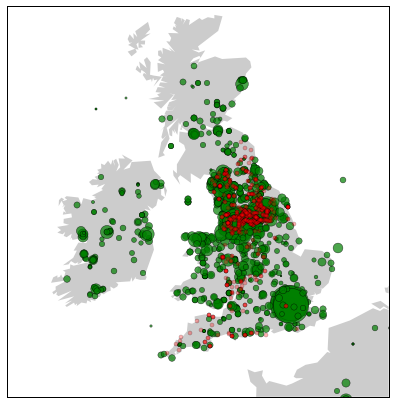

In [12]:
fig = figure(figsize=(14,7))
ax = fig.add_subplot(111, frame_on=False)
#mp = Basemap(projection='robin', lat_0=0, lon_0=0,
#              resolution='l', area_thresh=1000.0)
mp = Basemap(projection='merc', lat_0=53.458736, lon_0=-2.2,
    resolution='l', area_thresh = 1000.0,
    urcrnrlat=58.869587, urcrnrlon=4.186178,
    llcrnrlat=48.949979, llcrnrlon=-12.359231) # lat, lon

for x in docs:
    for p in x['centres']:
        if p is None: 
            continue
        x2,y = mp(p[1], p[0])
        
        #ms = (len(x['tweets']) / 10) ** (1/2)
        ms = (sum([1 / i for i in x['areas']])) ** (1/4)
        
        mp.plot(x2, y, 'o', markersize=ms, color='green', alpha=0.7)
        
for x in floods:
    if x['starttime'] < tmin or x['starttime'] > tmax:
        continue
    try:
        x2,y = mp(x['coordinates'][0], x['coordinates'][1])
    except KeyError:
        continue
        
    mp.plot(x2, y, 'o', markersize=4, color='red', alpha=0.3)
        
#mp.drawcoastlines()
#mp.drawcountries()
mp.fillcontinents(color='#CCCCCC')#, zorder=0)
mp.drawmapboundary()

plt.savefig('map-points-500k-area.png', dpi=200, alpha=True)

In [12]:
segs = 3
diff = (tmax - tmin) / segs
segmins = [tmin + (i * diff) for i in range(segs)]
segmaxs = [tmin + ((i+1) * diff) for i in range(segs)]

segevs = []
for d in range(segs):
    segevs.append([])
    for x in docs:
        if (x['times']['start'] >= segmins[d] and x['times']['start'] < segmaxs[d]) or \
            (x['times']['finish'] >= segmins[d] and x['times']['finish'] < segmaxs[d]):
            segevs[d].append(x)

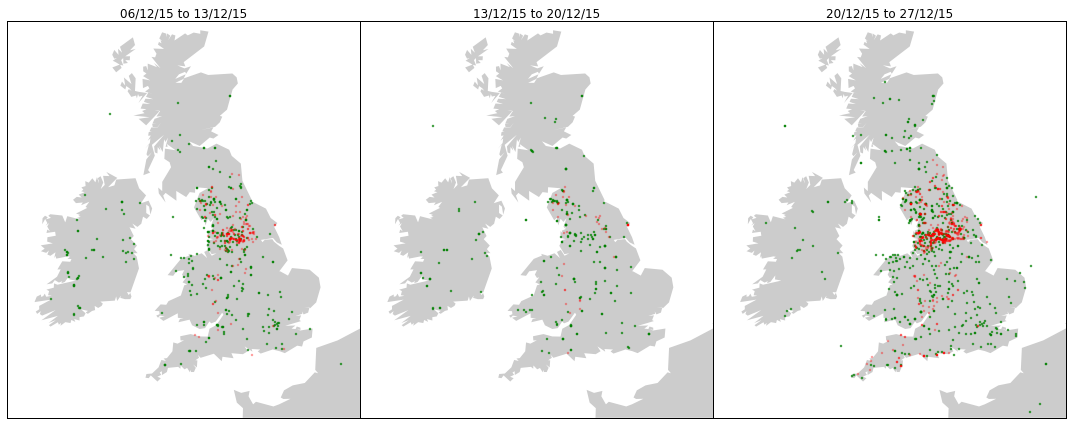

In [17]:
# plotting multiple
# 3 = figsize(15, 4)
figsize(15, 6)
f, axarr = plt.subplots(1, segs, sharey=True)

for bm_x in range(segs):
    bm_plt = axarr[bm_x]
    
    dformat = "%d/%m/%y"
    bm_plt.set_title(segmins[bm_x].strftime(dformat) + " to " + segmaxs[bm_x].strftime(dformat))
    
    mp = Basemap(projection='merc', lat_0=53.458736, lon_0=-2.2,
        resolution='l', area_thresh = 1000.0,
        urcrnrlat=58.869587, urcrnrlon=4.186178,
        llcrnrlat=48.949979, llcrnrlon=-12.359231, ax=bm_plt) # lat, lon

    for x in segevs[bm_x]:
        for p in x['centres']:
            if p is None: 
                continue
                
            #if len(x['tweets']) < 100:
            #    continue 
                
            x2,y = mp(p[1], p[0])
            
            #ms = (len(x['tweets']) / 10) ** (1/2)
            ms = (sum([1 / i for i in x['areas']])) ** (1/4)

            mp.plot(x2, y, '.', markersize=4, color='green', alpha=0.7) #markersize=ms
        
    for x in floods:
        if x['starttime'] < segmins[bm_x] or x['starttime'] > segmaxs[bm_x]:
            continue
        try:
            x2,y = mp(x['coordinates'][0], x['coordinates'][1])
        except KeyError:
            continue

        mp.plot(x2, y, '.', markersize=4, color='red', alpha=0.3)
        
    #mp.drawcoastlines()
    #mp.drawcountries()
    mp.fillcontinents(color='#CCCCCC')#, zorder=0)
    mp.drawmapboundary()

tight_layout()
subplots_adjust(wspace=0)
plt.savefig('uk-events-weekly3.png', dpi=200, alpha=True)

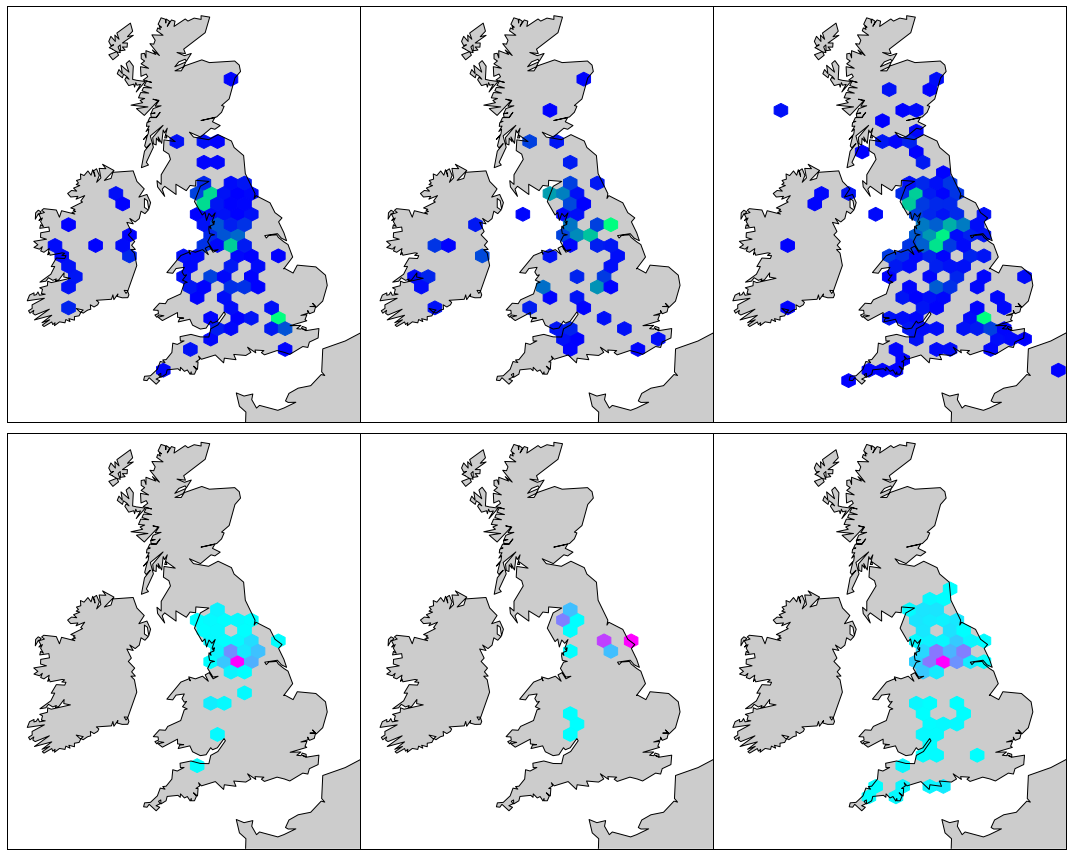

In [137]:
figsize(15, 12)
f, axarr = plt.subplots(2, segs, sharey=True)

for bm_x in range(segs):
    bm_plt = axarr[0, bm_x]
    
    mp = Basemap(projection='merc', lat_0=53.458736, lon_0=-2.2,
        resolution='l', area_thresh = 1000.0,
        urcrnrlat=58.869587, urcrnrlon=4.186178,
        llcrnrlat=48.949979, llcrnrlon=-12.359231, ax=bm_plt)
    
    c1 = mp(4.186178, 58.869587)
    c2 = mp(-12.359231, 48.949979)
    
    xp = [c1[0], c2[0]]
    yp = [c1[1], c2[1]]
    cp = [0, 0]

    for x in segevs[bm_x]:
        for p in x['centres']:
            if p[0] > 58.869587 or p[0] < 48.949979 or p[1] < -12.359231 or p[1] > 4.186178:
                continue
            
            x2,y2 = mp(p[1], p[0])
            xp.append(x2)
            yp.append(y2)
            cp.append((len(x['tweets']) / len(x['centres'])) ** (1/2))
        
    mp.fillcontinents(color='#CCCCCC', zorder=0)
    mp.drawcoastlines()

    mp.hexbin(array(xp), array(yp), C=cp, gridsize=(30, 20), cmap='winter', mincnt=1, reduce_C_function=sum)
    #mp.colorbar(location='bottom')

for bm_x in range(segs):
    bm_plt = axarr[1, bm_x]
    
    mp = Basemap(projection='merc', lat_0=53.458736, lon_0=-2.2,
        resolution='l', area_thresh = 1000.0,
        urcrnrlat=58.869587, urcrnrlon=4.186178,
        llcrnrlat=48.949979, llcrnrlon=-12.359231, ax=bm_plt)
    
    c1 = mp(4.186178, 58.869587)
    c2 = mp(-12.359231, 48.949979)
    
    xp = [c1[0], c2[0]]
    yp = [c1[1], c2[1]]
    cp = [0, 0]

    for x in floods:
        if x['starttime'] < segmins[bm_x] or x['starttime'] > segmaxs[bm_x]:
            continue
        try:
            x2,y = mp(x['coordinates'][0], x['coordinates'][1])
        except KeyError:
            continue

        xp.append(x2)
        yp.append(y)
        cp.append(1)
        
    mp.fillcontinents(color='#CCCCCC', zorder=0)
    mp.drawcoastlines()

    mp.hexbin(array(xp), array(yp), C=cp, gridsize=(30, 20), cmap='cool', mincnt=1, reduce_C_function=sum)
    #mp.colorbar(location='bottom')
    
tight_layout()
subplots_adjust(wspace=0)
plt.savefig('uk-events-weekly-heatmap3.png', dpi=200, alpha=True)

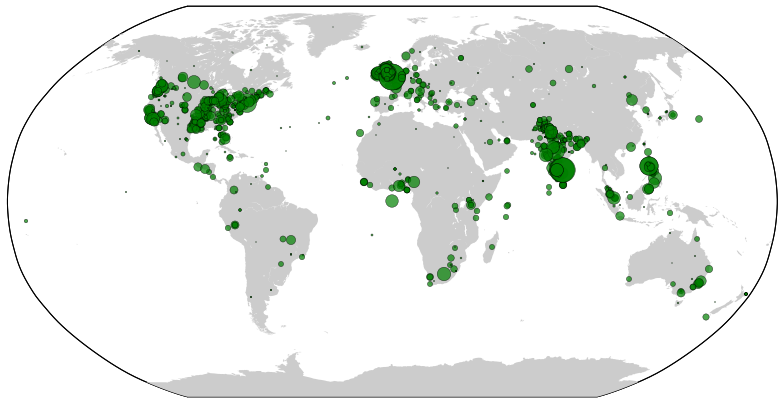

In [10]:
fig = figure(figsize=(14,7))
ax = fig.add_subplot(111, frame_on=False)
mp = Basemap(projection='robin', lat_0=0, lon_0=0,
              resolution='l', area_thresh=1000.0)
#mp = Basemap(projection='merc', lat_0=53.458736, lon_0=-2.2,
#    resolution='l', area_thresh = 1000.0,
#    urcrnrlat=58.869587, urcrnrlon=4.186178,
#    llcrnrlat=48.949979, llcrnrlon=-12.359231) # lat, lon

for x in docs:
    for p in x['centres']:
        if p is None: 
            continue
        x2,y = mp(p[1], p[0])
        
        #ms = (len(x['tweets']) / 10) ** (1/2)
        ms = (sum([1 / i for i in x['areas']])) ** (1/4)
        
        mp.plot(x2, y, 'o', markersize=ms, color='green', alpha=0.7)
        
#mp.drawcoastlines()
#mp.drawcountries()
mp.fillcontinents(color='#CCCCCC')#, zorder=0)
mp.drawmapboundary()

plt.savefig('map-points-500k-area_2.png', dpi=200, alpha=True)

In [15]:
import csv

floodlocs = []
with open('usstorms2015.csv') as file:
    csvreader = csv.reader(file)
    
    for x in csvreader:
        if x[0] == '201512':
            floodlocs.append((float(x[7]), float(x[8])))

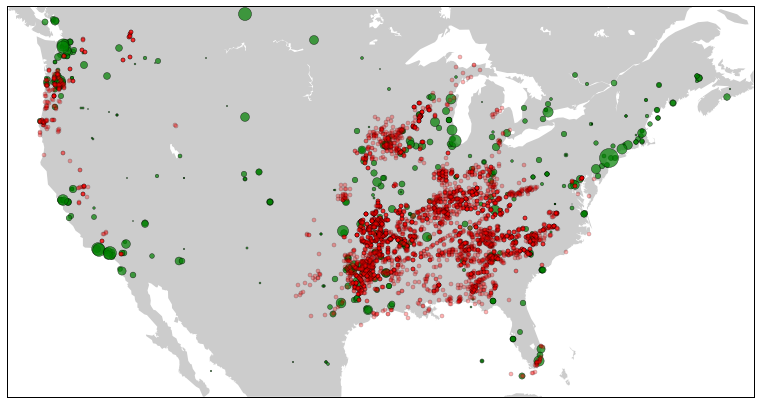

In [20]:
fig = figure(figsize=(14,7))
ax = fig.add_subplot(111, frame_on=False)
mp = Basemap(projection='merc', lat_0=53.458736, lon_0=-2.2,
    resolution='l', area_thresh = 1000.0,
    urcrnrlat=50.124303, urcrnrlon=-61.248737,
    llcrnrlat=22.882793, llcrnrlon=-127.342485) # lat, lon

for x in docs:
    for p in x['centres']:
        if p is None: 
            continue
        x2,y = mp(p[1], p[0])
        
        #ms = (len(x['tweets']) / 10) ** (1/2)
        ms = (sum([1 / i for i in x['areas']])) ** (1/4)
        
        mp.plot(x2, y, 'o', markersize=ms, color='green', alpha=0.7)
        
for d in floodlocs:
    x, y = mp(d[1], d[0])
        
    mp.plot(x, y, 'o', markersize=4, color='red', alpha=0.3)
        
#mp.drawcoastlines()
#mp.drawcountries()
mp.fillcontinents(color='#CCCCCC')#, zorder=0)
mp.drawmapboundary()

plt.savefig('map-points-500k-area_24.png', dpi=200, alpha=True)

In [40]:
min_i_ym = int(str(tmin.year) + str(tmin.month))
max_i_ym = int(str(tmax.year) + str(tmax.month))

us_floodl = []
with open('usstorms2015-deets.csv') as file:
    csvreader = csv.reader(file)
    next(csvreader, None)
    
    for x in csvreader:
        if int(x[0]) < min_i_ym and int(x[3]) < max_i_ym:
            continue
            
        if (int(x[1]) < tmin.day and int(x[4]) < tmin.day) or (int(x[1]) > tmax.day):
            continue
            
        if "flood" not in x[12].lower():
            continue
        
        try:
            us_floodl.append((float(x[44]), float(x[45])))
        except ValueError:
            pass
        
len(us_floodl)

171

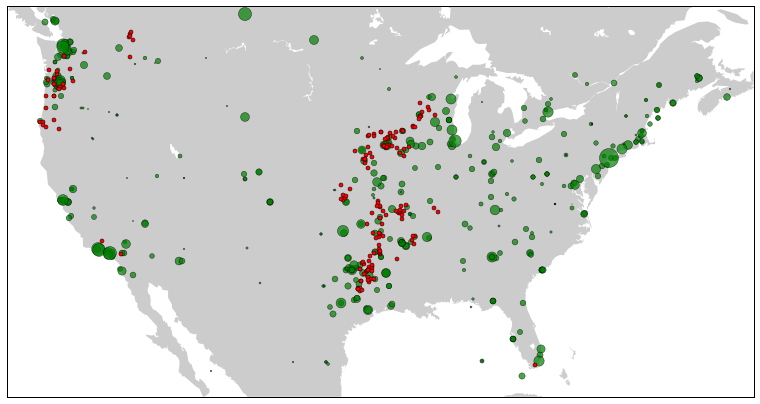

In [42]:
fig = figure(figsize=(14,7))
ax = fig.add_subplot(111, frame_on=False)
mp = Basemap(projection='merc', lat_0=53.458736, lon_0=-2.2,
    resolution='l', area_thresh = 1000.0,
    urcrnrlat=50.124303, urcrnrlon=-61.248737,
    llcrnrlat=22.882793, llcrnrlon=-127.342485) # lat, lon

for x in docs:
    for p in x['centres']:
        if p is None: 
            continue
        x2,y = mp(p[1], p[0])
        
        #ms = (len(x['tweets']) / 10) ** (1/2)
        ms = (sum([1 / i for i in x['areas']])) ** (1/4)
        
        mp.plot(x2, y, 'o', markersize=ms, color='green', alpha=0.7)
        
for d in us_floodl:
    x, y = mp(d[1], d[0])
        
    mp.plot(x, y, 'o', markersize=4, color='red', alpha=1)
        
#mp.drawcoastlines()
#mp.drawcountries()
mp.fillcontinents(color='#CCCCCC')#, zorder=0)
mp.drawmapboundary()

plt.savefig('map-points-500k-area_24.png', dpi=200, alpha=True)